<a href="https://colab.research.google.com/github/rizalanhari/PCVK_Genap_2021/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


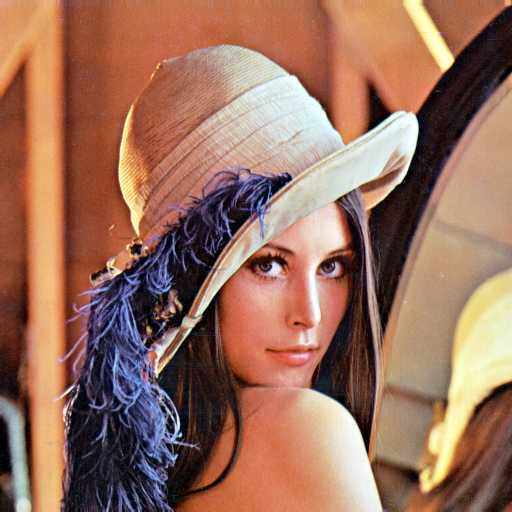

<BarContainer object of 256 artists>

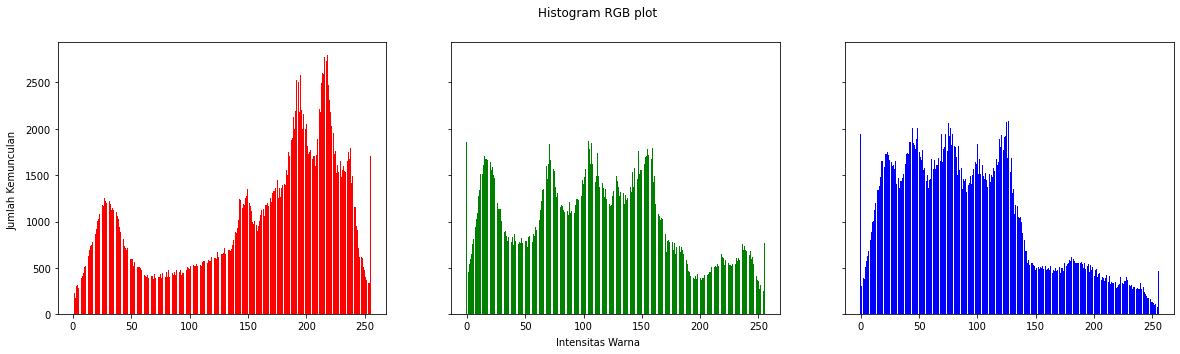

In [15]:
img = cv.imread('/content/drive/MyDrive/lena.jpg')
cv2_imshow(img)
height, width, depth = np.shape(original)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height) :
  for x in range(0,width) :
    red[img[y][x][2]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][0]] += 1
    
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

Text(0, 0.5, 'Jumlah Kemunculan')

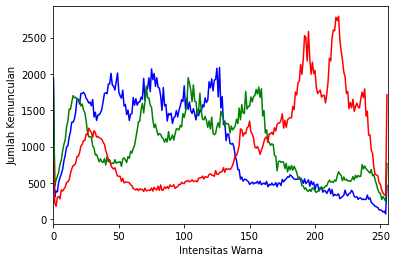

In [16]:
colors = ("b", "g", "r")
channel_ids = (0,1,2)

plt.xlim([0,256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        img[:,:, channel_id], bins=256, range=(0,256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan") 

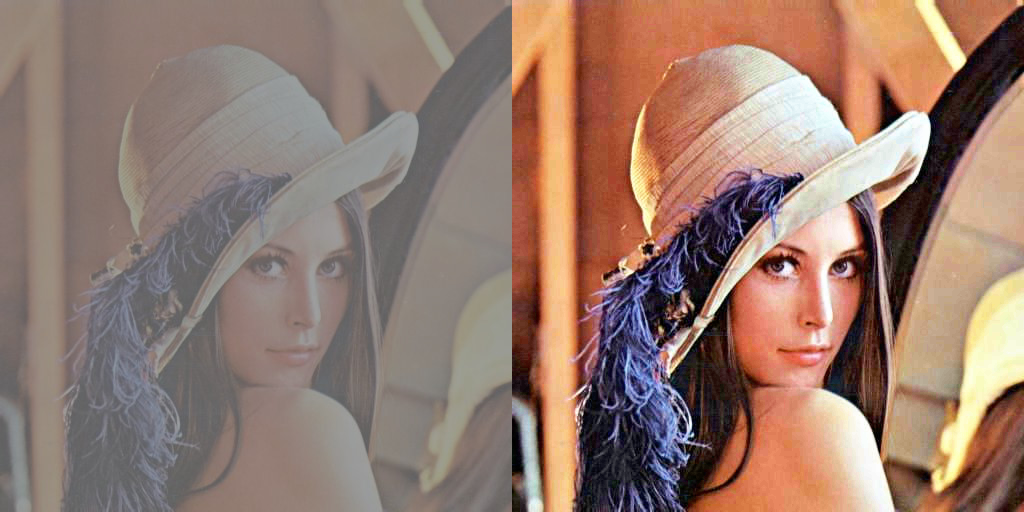

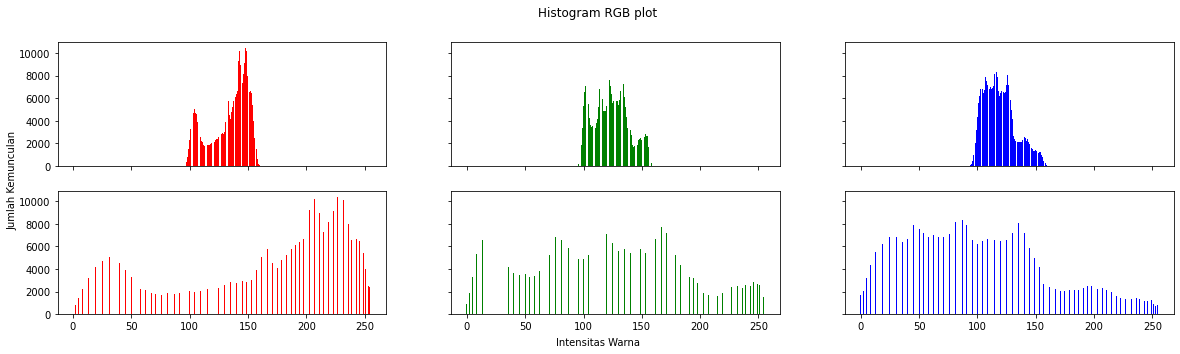

In [17]:
img = cv.imread('/content/drive/MyDrive/lena_lc.jpg')
def histog(img):
  height, width, depth = np.shape(img) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1 
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1 
  return ax

histo_asli = histog(img)

#convert to Numpy array 
img_array = np.asarray(img)

#STEP 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning 
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize 
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram 
chistogram_array = np.cumsum(histogram_array)

#STEP 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#STEP 3: Transformation
# flatten image array into 10 list 
img_list = list(img_array.flatten())

# transform pixel values to equalize 
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array 
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='red') 
  axs[0,1].bar(names, histo_asli[1], color='green') 
  axs[0,2].bar(names, histo_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')